In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.target[:2] # target columns i.e the price of the house

array([24. , 21.6])

In [5]:
boston.data # consist of fetures i.e info. about the house

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
data_frame = pd.DataFrame(boston.data, columns= boston.feature_names)
data_frame['PRICE'] = boston.target

In [9]:
# data_frame.columns =  # Giving Column names to out data
data_frame.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
len(data_frame[data_frame['B']<350])

82

In [11]:
data_frame.shape

(506, 14)

C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[25, 75]

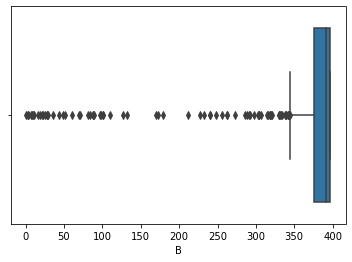

In [12]:
sns.boxplot(data_frame['B'])

np.set_printoptions(suppress=True)
np.percentile(data_frame['CRIM'],np.arange(1,99))


[25, 75]

In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


CRIM


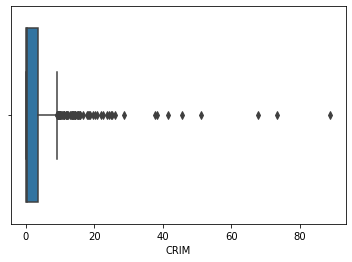

ZN


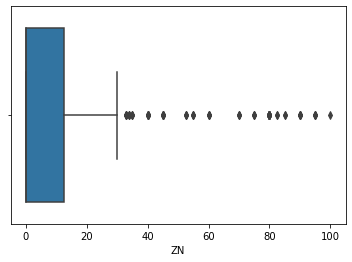

INDUS


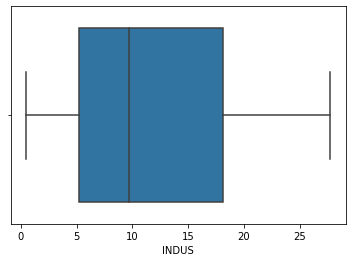

NOX


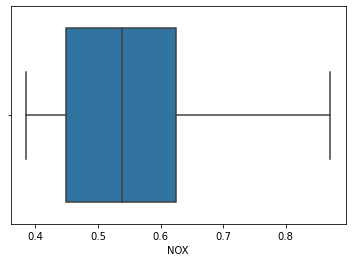

AGE


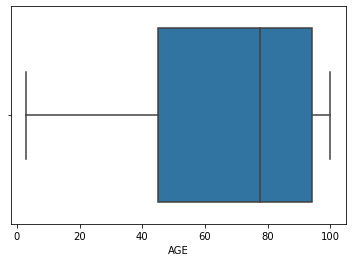

DIS


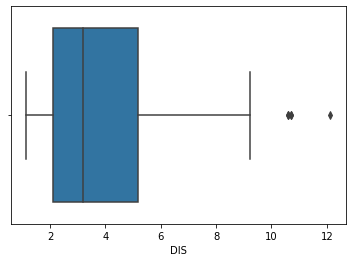

RAD


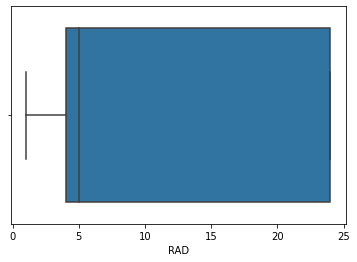

TAX


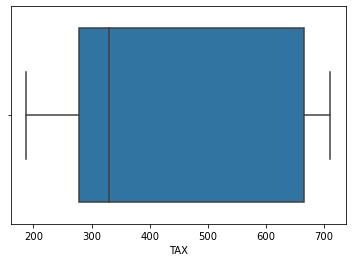

PTRATIO


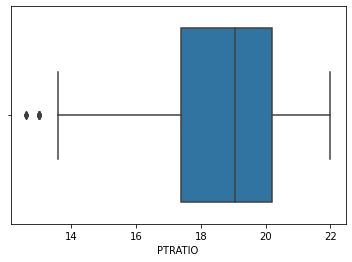

B


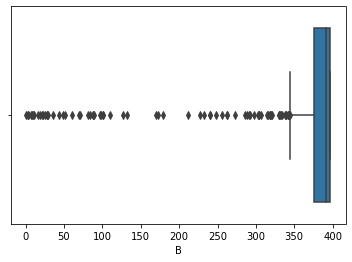

LSTAT


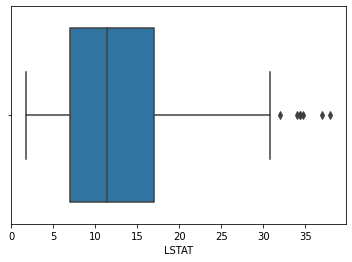

In [14]:
for i in data_frame.drop(['CHAS','PRICE','RM'], axis=1).columns:
    print(i)
    sns.boxplot(x=data_frame[i],data = data_frame)
    plt.show()

In [15]:
def Outlier(data):
    for column in data.drop(['CHAS','PRICE','RM'], axis=1).columns:
        if data[column].dtype != object:
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR =  Q3 - Q1
            lower = Q1 - (1.5 * IQR) # min value allowed
            upper = Q3 + (1.5 * IQR)  # max. value allowed
            data.loc[:,column] = np.where(data[column].values > upper, upper, data[column].values)
            data.loc[:,column] = np.where(data[column].values < lower, lower, data[column].values)
           
    return data

data_frame2 = Outlier(data_frame)
data_frame2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

CRIM


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


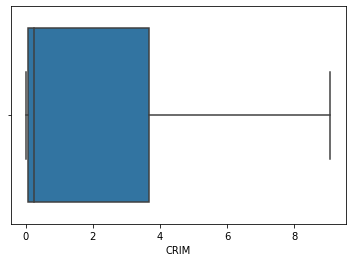

ZN


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


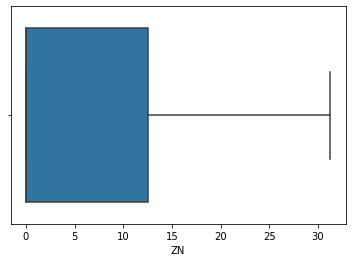

INDUS


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


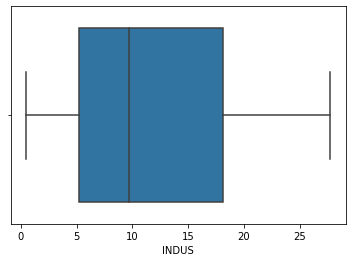

CHAS


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


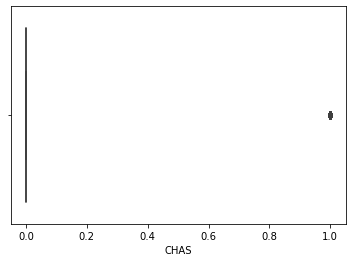

C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NOX


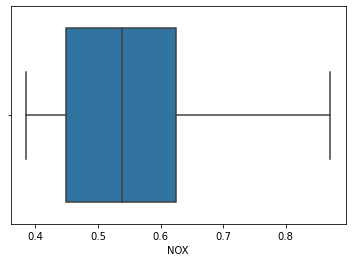

RM


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


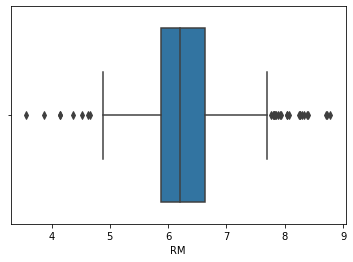

AGE


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


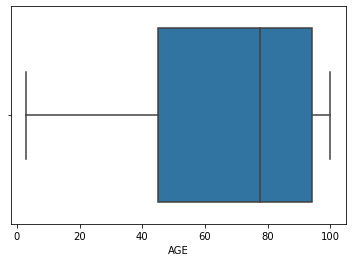

DIS


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


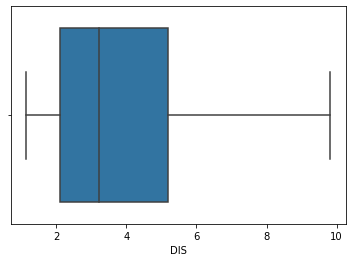

C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RAD


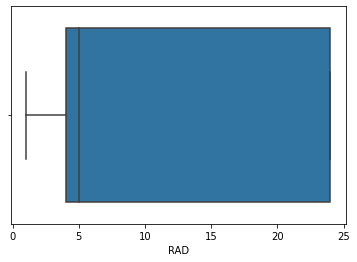

TAX


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


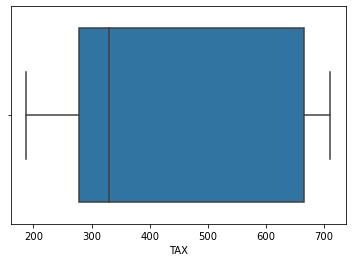

PTRATIO


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


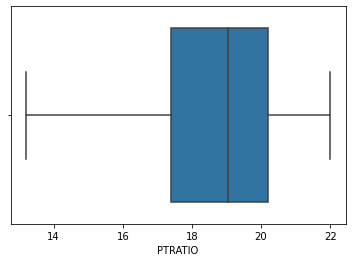

B


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


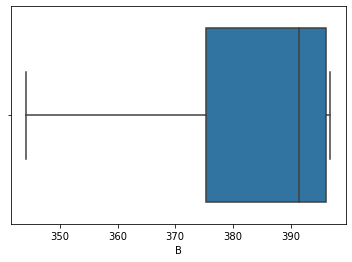

C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


LSTAT


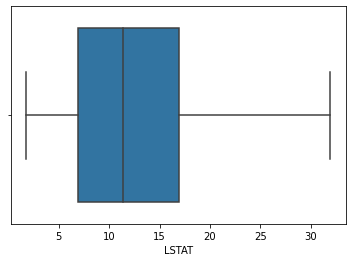

PRICE


C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


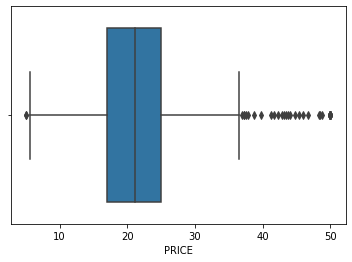

In [16]:
# checking treated data for outliers
for i in data_frame2.columns:
    print(i)
    sns.boxplot(data_frame2[i],data = data_frame2)
    plt.show()

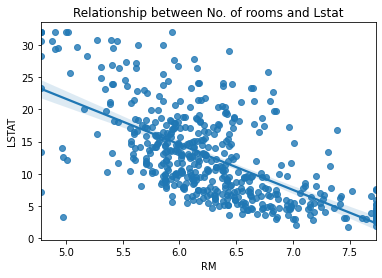

In [30]:
sns.regplot(x="RM",y="LSTAT", data=data_frame2, fit_reg=True)
plt.title("Relationship between No. of rooms and Lstat")
plt.show()

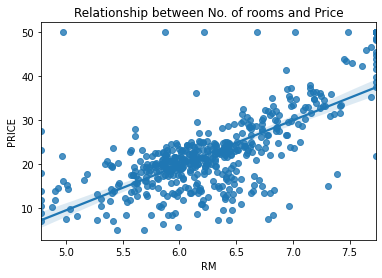

In [31]:
# Between prices and No. of rooms
sns.regplot(x="RM",y="PRICE", data=data_frame2)
plt.title("Relationship between No. of rooms and Price")
plt.show()

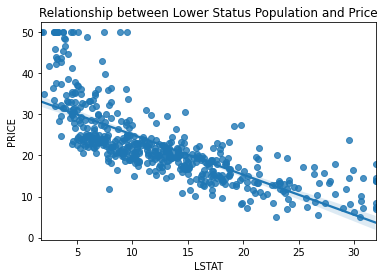

In [ ]:
# Between prices and Lower Status Population
sns.regplot(y="PRICE",x="LSTAT", data=data_frame2, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.show()

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

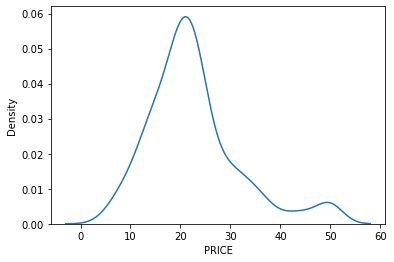

In [32]:
sns.kdeplot(data_frame2['PRICE']) # kernal density estimation

C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


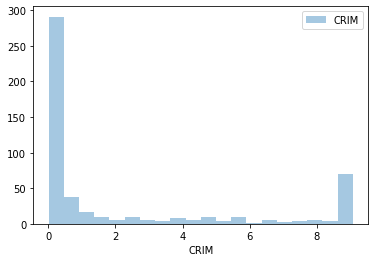

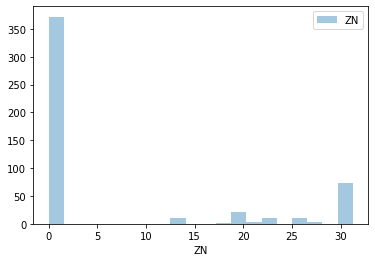

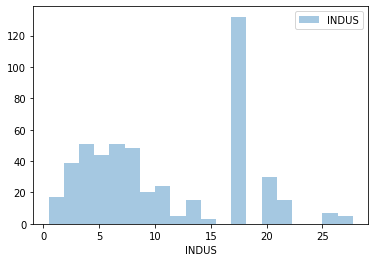

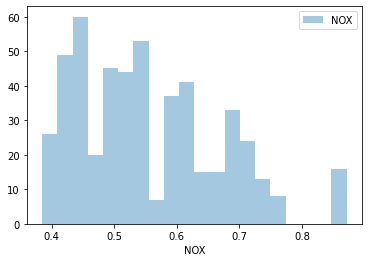

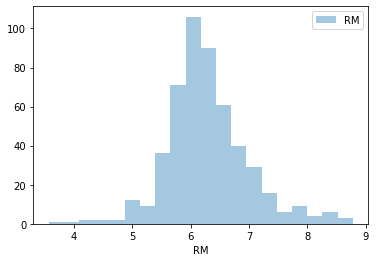

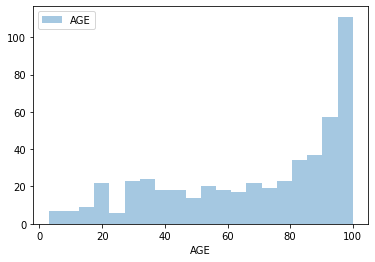

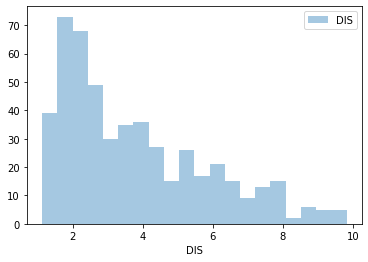

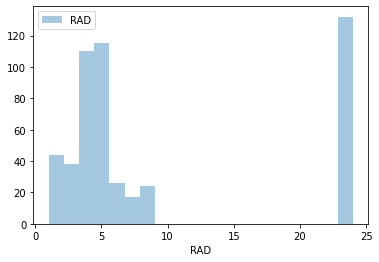

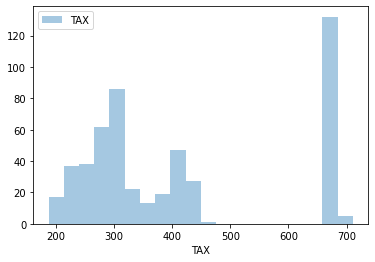

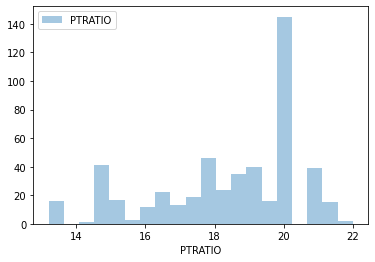

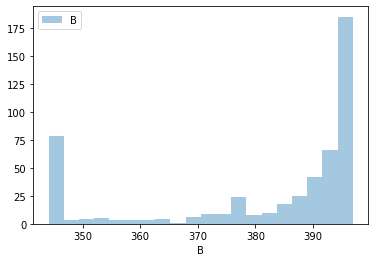

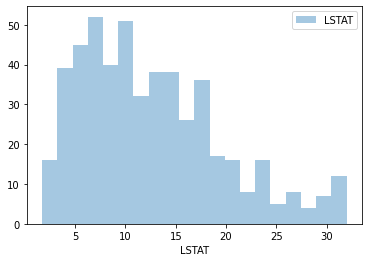

In [17]:
for val in data_frame2.drop(['PRICE','CHAS'], axis = 1):
    sns.distplot(data_frame2[val], kde = False,bins=20,label=val)
    plt.legend()
    plt.show()


In [ ]:
# print(data_frame.CRIM.mean(), data_frame.CRIM.median(), data_frame.CRIM.mode()[0])

In [ ]:
# print(data_frame.B.mean(), data_frame.B.median(), data_frame.B.mode()[0])

In [18]:
data_frame2[data_frame2.duplicated()==True].index # to get to know the duplicate data indexs

Int64Index([], dtype='int64')

In [19]:
# Check Duplicate Records in a data
data_frame2.duplicated().sum()
data_frame2.drop_duplicates(inplace=True)

In [20]:
data_frame2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.225032,6.963439,11.136779,0.069170,0.554695,6.284634,68.574901,3.783947,9.549407,408.237154,18.463834,381.918836,12.612011,22.532806
std,3.313353,12.028788,6.860353,0.253994,0.115878,0.702617,28.148861,2.069765,8.707259,168.537116,2.143924,19.054913,7.016829,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.200000,344.106250,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.069639,31.250000,27.740000,1.000000,0.871000,8.780000,100.000000,9.820800,24.000000,711.000000,22.000000,396.900000,31.962500,50.000000


In [21]:
data_frame2.corr()

# -1 to +1  -- close to 0

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.370213,0.629315,-0.030748,0.663412,-0.264338,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.454495
ZN,-0.370213,1.000000,-0.584079,-0.038059,-0.549670,0.331999,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.374691
INDUS,0.629315,-0.584079,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.483725
CHAS,-0.030748,-0.038059,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099435,-0.007368,-0.035587,-0.123763,-0.011069,-0.053288,0.175260
NOX,0.663412,-0.549670,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.427321
RM,-0.264338,0.331999,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.208558,-0.209847,-0.292048,-0.353229,0.192227,-0.611234,0.695360
AGE,0.518951,-0.583149,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.376955
DIS,-0.555054,0.681019,-0.713079,-0.099435,-0.775934,0.208558,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.253172
RAD,0.926977,-0.344043,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.392793,0.489186,-0.381626
TAX,0.870686,-0.383860,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.433288,0.545598,-0.468536


In [22]:
data_frame2.isna().sum() # total null value count

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

<AxesSubplot:>

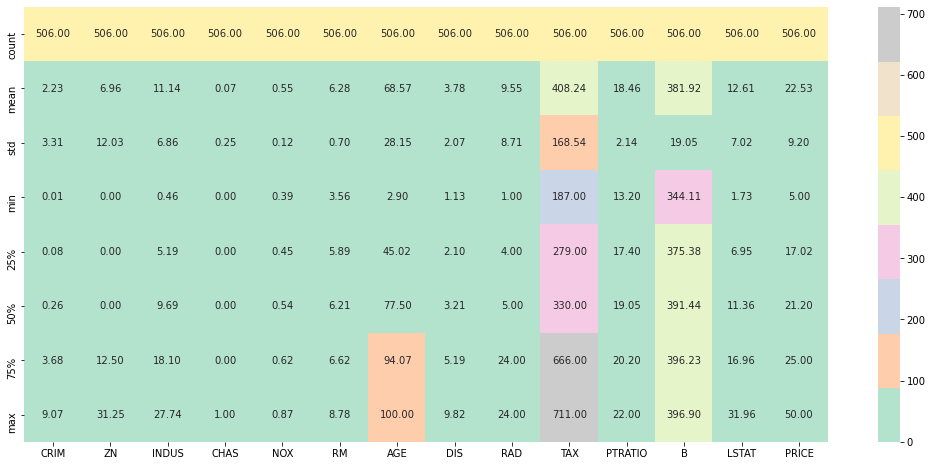

In [23]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(data_frame.describe(), annot = True, fmt='0.2f', cmap='Pastel2') # used where data has more than 2d

<AxesSubplot:>

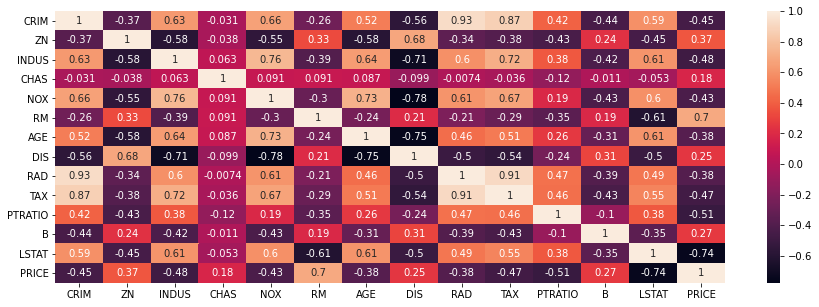

In [24]:
fig = plt.figure(figsize = (15,5))
sns.heatmap(data_frame2.corr(), annot = True)

In [ ]:
# Outliers
# data visualisation
# duplicated data check
# null value check
# correlation check and plotted them
# info, describe check
# till this point all features are in number from 
# no furtur type casting as data is clean , 
# no dummy needed
# created features, target- using correlation score
# created train test data from features and target using train test split
# scaled the data
# import algorithm 
# train the algorithm on scaled data
# predicted the values on scaled test data
# calculated MSE, RMSE, R2

In [25]:
X = data_frame2.drop(['PRICE','CHAS','DIS','B'], axis = 1) # Independet Feature
y = data_frame2['PRICE'] # Target

In [26]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,5.33


In [27]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

# Min MAx Scaler
![normal.png](attachment:normal.png)

# Standard Scaler
![standard.png](attachment:standard.png)

In [28]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 41)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()  # mean around 0 ,and Variance around 1
min_max = MinMaxScaler()  # values will always lie in range 0-1

x_train_transformed = min_max.fit_transform(X_train)

x_test_transformed = min_max.transform(X_test) # will always return array

In [33]:
print(X_train.size,X_test.size,y_train.size, y_test.size)

3790 1270 379 127


In [34]:
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
295,0.129320,0.0,13.92,0.437,6.678,31.1,4.0,289.0,16.0,6.27
252,0.082210,22.0,5.86,0.431,6.957,6.8,7.0,330.0,19.1,3.53
324,0.341090,0.0,7.38,0.493,6.415,40.1,5.0,287.0,19.6,6.12
379,9.069639,0.0,18.10,0.671,6.223,100.0,24.0,666.0,20.2,21.78
261,0.534120,20.0,3.97,0.647,7.520,89.4,5.0,264.0,13.2,7.26


In [35]:
X_test.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
157,1.22358,0.00,19.58,0.605,6.943,97.4,5.0,403.0,14.7,4.59
358,5.20177,0.00,18.10,0.770,6.127,83.4,24.0,666.0,20.2,11.48
495,0.17899,0.00,9.69,0.585,5.670,28.8,6.0,391.0,19.2,17.60
299,0.05561,31.25,2.24,0.400,7.041,10.0,5.0,358.0,14.8,4.74
193,0.02187,31.25,2.93,0.401,6.800,9.9,1.0,265.0,15.6,5.03


In [66]:
y_train.head()

295    28.6
252    29.6
324    25.0
379    10.2
261    43.1
Name: PRICE, dtype: float64

In [67]:
y_test.head()

157    41.3
358    22.7
495    23.1
299    29.0
193    31.1
Name: PRICE, dtype: float64

In [36]:
pd.DataFrame(x_train_transformed, columns = X_train.columns) # getting dataframe out of transformed data

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.013273,0.000,0.493402,0.106996,0.603602,0.267021,0.130435,0.194656,0.318182,0.150170
1,0.008073,0.704,0.197947,0.094650,0.657630,0.008511,0.260870,0.272901,0.670455,0.059539
2,0.036646,0.000,0.253666,0.222222,0.552672,0.362766,0.173913,0.190840,0.727273,0.145208
3,1.000000,0.000,0.646628,0.588477,0.515492,1.000000,1.000000,0.914122,0.795455,0.663194
4,0.057950,0.640,0.128666,0.539095,0.766654,0.887234,0.173913,0.146947,0.000000,0.182916
...,...,...,...,...,...,...,...,...,...,...
374,0.003540,0.800,0.161290,0.084362,0.613091,0.292553,0.130435,0.179389,0.659091,0.117754
375,0.631538,0.000,0.646628,0.302469,0.677769,0.755319,1.000000,0.914122,0.795455,0.174646
376,0.647088,0.000,0.646628,0.633745,0.550736,0.957447,1.000000,0.914122,0.795455,0.583478
377,1.000000,0.000,0.646628,0.685185,0.631875,0.750000,1.000000,0.914122,0.795455,0.694947


In [55]:
X_test.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
157,1.22358,0.00,19.58,0.605,6.943,97.4,5.0,403.0,14.7,4.59
358,5.20177,0.00,18.10,0.770,6.127,83.4,24.0,666.0,20.2,11.48
495,0.17899,0.00,9.69,0.585,5.670,28.8,6.0,391.0,19.2,17.60
299,0.05561,31.25,2.24,0.400,7.041,10.0,5.0,358.0,14.8,4.74
193,0.02187,31.25,2.93,0.401,6.800,9.9,1.0,265.0,15.6,5.03


In [ ]:
y_test.head()

157    41.3
358    22.7
495    23.1
299    29.0
193    31.1
Name: PRICE, dtype: float64

In [56]:
pd.DataFrame(min_max.inverse_transform(x_train_transformed), columns = X_train.columns) 
# getting values back from transfored data using inverse_transform function

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.129320,0.0,13.92,0.437,6.678,31.1,4.0,289.0,16.0,6.27
1,0.082210,22.0,5.86,0.431,6.957,6.8,7.0,330.0,19.1,3.53
2,0.341090,0.0,7.38,0.493,6.415,40.1,5.0,287.0,19.6,6.12
3,9.069639,0.0,18.10,0.671,6.223,100.0,24.0,666.0,20.2,21.78
4,0.534120,20.0,3.97,0.647,7.520,89.4,5.0,264.0,13.2,7.26
...,...,...,...,...,...,...,...,...,...,...
374,0.041130,25.0,4.86,0.426,6.727,33.5,4.0,281.0,19.0,5.29
375,5.731160,0.0,18.10,0.532,7.061,77.0,24.0,666.0,20.2,7.01
376,5.872050,0.0,18.10,0.693,6.405,96.0,24.0,666.0,20.2,19.37
377,9.069639,0.0,18.10,0.718,6.824,76.5,24.0,666.0,20.2,22.74


In [38]:
# importing algorithm
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(x_train_transformed, y_train)

LinearRegression()

In [39]:
y_pred = lm.predict(x_test_transformed)
y_pred

array([36.75905804, 21.74867837, 12.83343737, 32.60712766, 30.24588931,
       20.20315576, 15.84711255, 31.12608388, 37.17739845,  1.50419939,
       23.38048024, 11.09863074, 26.03611629, 31.25909868, 20.50577817,
       21.62219998, 32.12646538, 23.40219561, 14.297703  , 11.68370399,
       20.33143271, 16.34577819, 20.38064512, 19.93080279, 20.59123878,
       15.30595082, 25.16943806, 10.43132293, 30.99635151, 21.88565107,
       11.29133918, 32.21594805, 26.17889347, 14.72303455, 29.02828613,
       35.93616563, 12.21637235, 20.25840916, 25.69321528, 21.64494804,
       28.25212516, 21.13762824, 19.47717577, 18.61549004, 27.41934207,
       35.79614171, 19.15140374, 14.49697757, 20.32942174, 25.65899823,
       25.81723598,  7.0896988 , 21.01346771, 27.23892502, 16.39230933,
       22.66592562, 21.19412798, 27.70640417, 28.65181413, 14.63578221,
       28.7563757 ,  2.00745647, 20.81158423, 18.70781244, 27.41974444,
       29.91129531, 14.71766585, 10.15876318, 23.87830122, 17.93

In [40]:
# visualising predictions along with actual data and price
test_results = pd.DataFrame(X_test)
test_results['y_test'] = y_test
test_results['predictions'] = y_pred
test_results

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,y_test,predictions
157,1.22358,0.00,19.58,0.605,6.943,97.4,5.0,403.0,14.7,4.59,41.3,36.759058
358,5.20177,0.00,18.10,0.770,6.127,83.4,24.0,666.0,20.2,11.48,22.7,21.748678
495,0.17899,0.00,9.69,0.585,5.670,28.8,6.0,391.0,19.2,17.60,23.1,12.833437
299,0.05561,31.25,2.24,0.400,7.041,10.0,5.0,358.0,14.8,4.74,29.0,32.607128
193,0.02187,31.25,2.93,0.401,6.800,9.9,1.0,265.0,15.6,5.03,31.1,30.245889
...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.08265,0.00,13.92,0.437,6.127,18.4,4.0,289.0,16.0,8.58,23.9,27.454018
497,0.26838,0.00,9.69,0.585,5.794,70.6,6.0,391.0,19.2,14.10,18.3,17.906708
56,0.02055,31.25,0.74,0.410,6.383,35.7,2.0,313.0,17.3,5.77,24.7,26.454324
359,4.26131,0.00,18.10,0.770,6.112,81.3,24.0,666.0,20.2,12.67,22.6,20.987832


In [45]:
'''y = mx +c -----> y = m1x1 + m2mx + .....+ mN Xn + C'''
display(lm.intercept_ , list(zip(lm.coef_, X_train.columns)))

23.677809188700763

[(-2.7471418555342506, 'CRIM'),
 (-0.7853949879970377, 'ZN'),
 (3.588972706782819, 'INDUS'),
 (-4.4783120864660475, 'NOX'),
 (21.50111435034733, 'RM'),
 (4.462912797392623, 'AGE'),
 (9.151162075223152, 'RAD'),
 (-7.524751000419834, 'TAX'),
 (-10.707918678629449, 'PTRATIO'),
 (-22.454184924190553, 'LSTAT')]

In [46]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-2.747142
ZN,-0.785395
INDUS,3.588973
NOX,-4.478312
RM,21.501114
AGE,4.462913
RAD,9.151162
TAX,-7.524751
PTRATIO,-10.707919
LSTAT,-22.454185


In [47]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [52]:
print('R^2:',r2_score(y_test, y_pred))

print('Adjusted R^2:',1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',mean_absolute_error(y_test, y_pred))

print('MSE:',mean_squared_error(y_test, y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R^2: 0.4791378230697676
Adjusted R^2: 0.4243102254981641
MAE: 3.5951235150087935
MSE: 24.302979003902024
RMSE: 4.929805168959725


#### OVERFITTING and UNDERFITTING

Overfitting happens to have - when Train Results (90 R2) > Test Results (60 R2)


Underfittig happens to have - Both Train and Test Results are not Good  - (R2 score - 50- train data & r2 score - 48 test data)

In [54]:
# TRAIN ERROR
y_train_pred = lm.predict(x_train_transformed)
# # Model Evaluation
print('R^2 Train:',metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE train:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))


# Testing Error(x_test_transformed)
print('\n R^2 Test:',metrics.r
y_pred = lm.predict2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE test:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE test:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

SyntaxError: invalid syntax (<ipython-input-54-1eb07487000f>, line 13)

# 1. Visualizing the differences between actual prices and predicted values

C:\Users\sagarsah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRICE', ylabel='CRIM'>

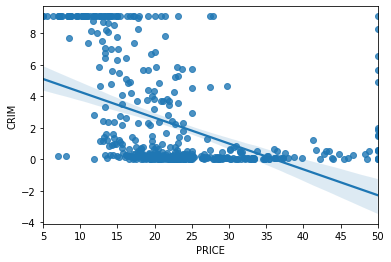

In [55]:
import seaborn as sns
sns.regplot(data_frame['PRICE'],data_frame['CRIM'], data=data_frame)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


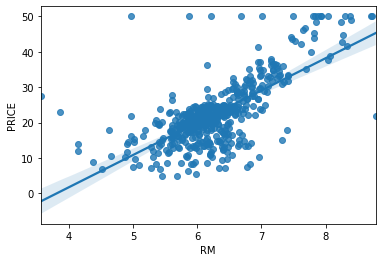

In [ ]:
sns.regplot(data_frame['RM'],data_frame['PRICE'], data=data_frame)

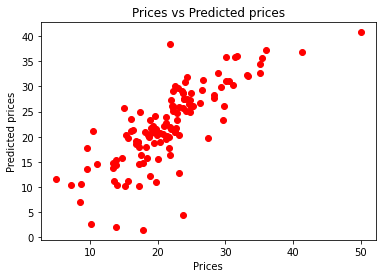

In [ ]:
plt.scatter(y_test,
            y_pred , 
            color = 'red')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


# 2.  Checking residuals - Heteroskedasticity - The presence of non-constant variance in the error terms results n heteroskedasticity


# The  variance in the error terms should be costant. 


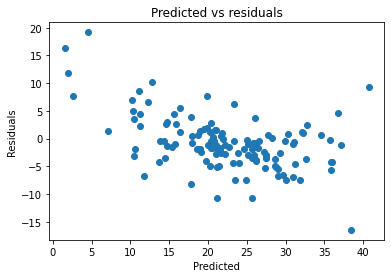

In [ ]:
plt.scatter(y_pred,
            y_test-y_pred)

plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


# 3. Checking Normality of errors


C:\Users\Dralls\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


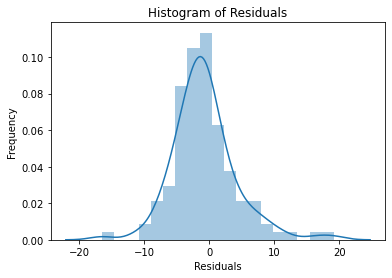

In [ ]:
sns.distplot(y_test-y_pred)

plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 4. Check for Multicollinearity

"multicollinearity" refers to predictors that are correlated with other predictors

* If the VIF is equal to 1 there is no multicollinearity among factors,
  but if the VIF is greater than 1, the predictors may be moderately correlated. 
  
*  A VIF between 5 and 10 indicates high multicollinearity that may be problematic

# Dealing with it

* Remove highly correlated predictors from the model.  
  If you have two or more factors with a high VIF, remove one from the model. 
  Because they supply redundant information, removing one of the correlated 
  factors usually doesn't drastically reduce the R-squared
  
* Can also Use PCA

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_frame.shape[1]

NameError: ignored

In [ ]:
# VIF(array , index)
h = [variance_inflation_factor(data_frame2.drop(['B','PTRATIO','PRICE'], axis=1).values, i) for i in range(11)]
pd.DataFrame(h, index=data_frame2.drop(['B','PTRATIO','PRICE'], axis=1).columns, columns = ['VIF Score'])

# VIF < 4 - no multicollinearity
# VIF > 4 - 10 - multicollinearity

# 5. Durbin- Watson Test for Autocoorelation for Errors


In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
# y_test - y_pred # SKLEARN LINEAR REGRESSION PREDICTED VALUE

In [ ]:
durbin_watson(y_test-y_pred)

2.0062636540270256